In [1]:
import tensorflow as tf 
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 
import time

In [2]:
model = tf.keras.models.load_model('saved_training_50epo.h5')

In [3]:
test_img = cv2.imread('cry.jpg')

In [4]:
test_img.shape

(315, 472, 3)

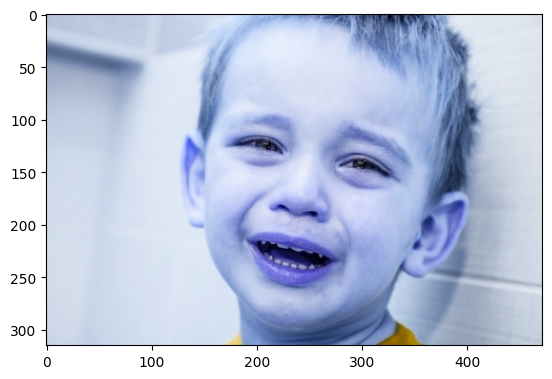

In [5]:
plt.imshow(test_img)

In [6]:
#convert to gray images

In [7]:
face_cascade = cv2.CascadeClassifier( 'haarcascade_frontalface_default.xml')

In [8]:
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(315, 472)

In [9]:
faces = face_cascade.detectMultiScale(gray_img, 1.1,4)
for x,y,z,h in faces:
    r_gray = gray_img[y:y+h, x:x+z]
    r_colour = test_img[y:y+h, x:x+z]
    cv2.rectangle(test_img, (x,y), (x+z, y+h), (0,255,0), 2)
    faces1 = face_cascade.detectMultiScale(r_gray)
    if len(faces1) == 0:
        print("no face detected")
    else:
        for a,b,c,d in faces1:
            face_r = r_colour[b:b+d, a:a+c]


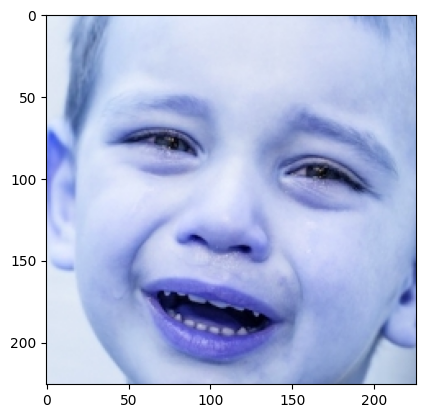

In [10]:
plt.imshow(cv2.cvtColor(face_r, cv2.COLOR_BGR2BGRA))

In [11]:
final_img = cv2.resize(face_r, (224,224))
final_img = np.expand_dims(final_img,axis=0)
final_img = final_img/255

In [12]:
pred = model.predict(final_img)
pred

1/1 [==============================] - 1s 531ms/step


array([[2.2230630e-05, 6.4144391e-05, 4.5269961e-03, 2.0171693e-01,
        6.6765681e-02, 7.2613698e-01, 7.6708256e-04]], dtype=float32)

In [13]:
np.argmax(pred)

5

In [14]:
#live demo

In [15]:
import cv2 
### pip install opencv-python
## pip install opencv-contrib-python fullpackage #from deepface import DeepFace ## pip install deepface 
path = "haarcascade_frontalface_default.xml"
font_scale=1.5
font = cv2.FONT_HERSHEY_PLAIN
# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0] # set the text start position
text_offset_x = 10
text_offset_y= img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width+2, text_offset_y - text_height - 2)) 
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)


cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")



while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.Cascade Classifier (cv2.data. haarcascades +'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier (cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
    gray_img = cv2.cvtColor (frame, cv2.COLOR_BGR2GRAY)
    #print (faceCascade.empty())
    faces = face_cascade.detectMultiScale(gray_img, 1.1,4)
    for x,y,z,h in faces:
        r_gray = gray_img[y:y+h, x:x+z]
        r_colour = frame[y:y+h, x:x+z]
        cv2.rectangle(test_img, (x,y), (x+z, y+h), (0,255,0), 2)
        faces1 = face_cascade.detectMultiScale(r_gray)
        if len(faces1) == 0:
            print("no face detected")
        else:
            for a,b,c,d in faces1:
                face_r = r_colour[b:b+d, a:a+c]

    ## cropping the face
    final_img = cv2.resize(face_r, (224,224))
    final_img = np.expand_dims(final_img,axis=0)
    final_img = final_img/255

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = model.predict(final_img)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN



    if (np.argmax (Predictions)==0): 
        status = "Angry"
        x1,y1, w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle (frame, (x, y), (x+z, y+h), (0, 0, 255))

    elif (np.argmax (Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))

    elif (np.argmax (Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))

    elif (np.argmax (Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))

    elif (np.argmax (Predictions)==5):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))
    
    elif (np.argmax (Predictions)==6):
        status = "Surprised"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))

    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+z, y+h), (0, 0, 255))


    cv2.imshow('face emotions',frame)
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break
    

cap.release()
cv2.destroyAllWindows()

OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


1/1 [==============================] - 0s 26ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 26ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 24ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 24ms/step
no face detected
1/1 [==============================] - 0s 24ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 26ms/step
no face detected
1/1 [==============================] - 0s 25ms/step
no face detected
1/1 [==============================] - 0s 26ms/step
no face detected
1/1 [==============================] - 0s 27ms/step
no face detected
1/1 [=============================

1/1 [==============================] - 0s 41ms/step
no face detected
1/1 [==============================] - 0s 43ms/step
